In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv("evap_data.csv")
print(df.head(1001))

            L2         P2         X2        Status
0     1.044823  50.398740  27.086354        Normal
1     1.008144  50.278103  22.925328        Normal
2     1.020359  51.458076  26.585295        Normal
3     0.974483  50.500776  24.569275        Normal
4     1.044522  50.482284  23.723251        Normal
...        ...        ...        ...           ...
996   0.973126  30.353787  14.657280  Pump_failure
997   0.929400  32.150560  14.353226  Pump_failure
998   0.962771  32.089406  10.721386  Pump_failure
999   0.959142  30.976363  11.745649  Pump_failure
1000  0.926636  30.847833  12.596403  Pump_failure

[1001 rows x 4 columns]


In [3]:
# Inputs and output
X = df[['L2','P2','X2']].to_numpy()
y = LabelEncoder().fit_transform(df['Status'])  
# Normal = 0, Pump_failure = 1
print(X)
print(y)

[[ 1.04482292 50.39874027 27.08635423]
 [ 1.00814405 50.27810345 22.92532847]
 [ 1.02035858 51.45807588 26.58529487]
 ...
 [ 0.96277132 32.08940554 10.72138554]
 [ 0.9591421  30.97636254 11.74564938]
 [ 0.92663553 30.84783275 12.59640277]]
[0 0 0 ... 1 1 1]


In [4]:
#number 1
# 60% training, 40% temp
X_train, X_2, y_train, y_2 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=0)

# split temp into validation and test (20% each)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, stratify=y_2, random_state=0)

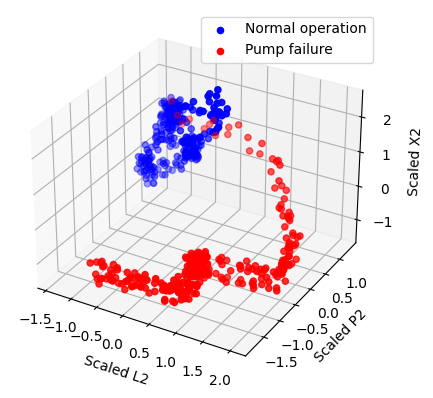

In [5]:
#no1-standard scaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)
X_test_scaled = sc.transform(X_test)

N_train = len(X_train_scaled)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train_scaled[y_train == 0,0], 
           X_train_scaled[y_train == 0,1], 
           X_train_scaled[y_train == 0,2], 
           c='b', label='Normal operation')
ax.scatter(X_train_scaled[y_train == 1,0], 
           X_train_scaled[y_train == 1,1], 
           X_train_scaled[y_train == 1,2], 
           c='r', label='Pump failure')
ax.set_xlabel('Scaled L2')
ax.set_ylabel('Scaled P2')
ax.set_zlabel('Scaled X2')
plt.legend()
plt.show()


In [9]:
X_train_2 = X_train_scaled[:, :2]
X_val_2   = X_val_scaled[:, :2]
X_test_2  = X_test_scaled[:, :2]

box_C = np.array([0.1,0.1,0.1, 1,1,1, 10,10,10])
gamma = np.array([0.1,1,10, 0.1,1,10, 0.1,1,10])


Box Constraint: 0.1, gamma = 0.1
  Accuracy for training: 0.9766666666666667
[[300   0]
 [ 14 286]]
  Accuracy for validation: 0.99
[[100   0]
 [  2  98]]
  Accuracy for testing: 0.9800995024875622
[[100   0]
 [  4  97]]


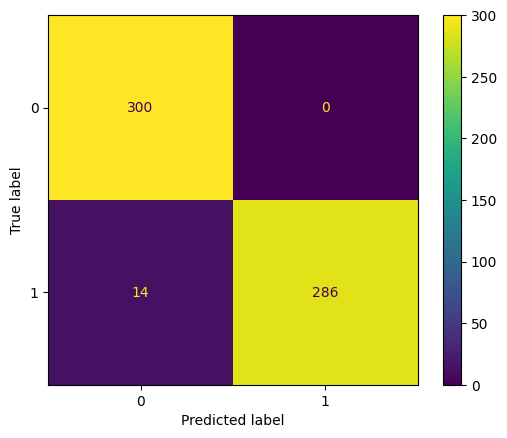

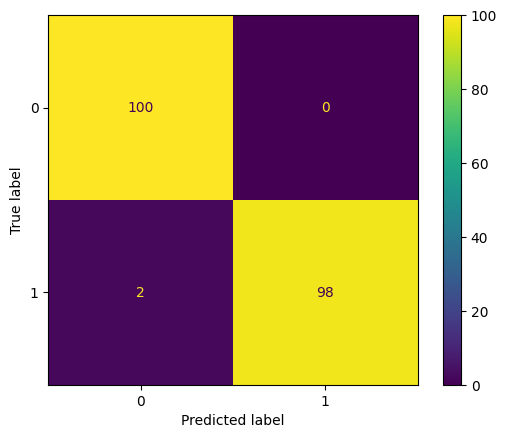

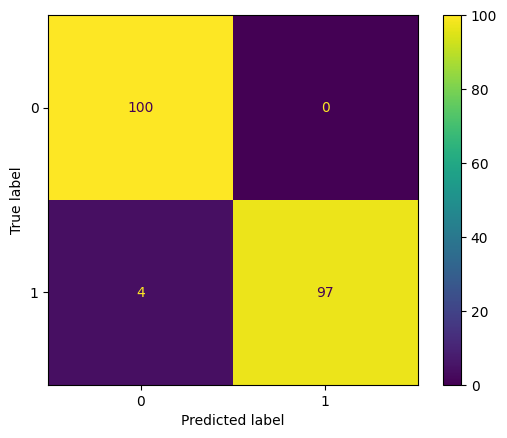

Box Constraint: 0.1, gamma = 1.0
  Accuracy for training: 0.98
[[300   0]
 [ 12 288]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9800995024875622
[[100   0]
 [  4  97]]


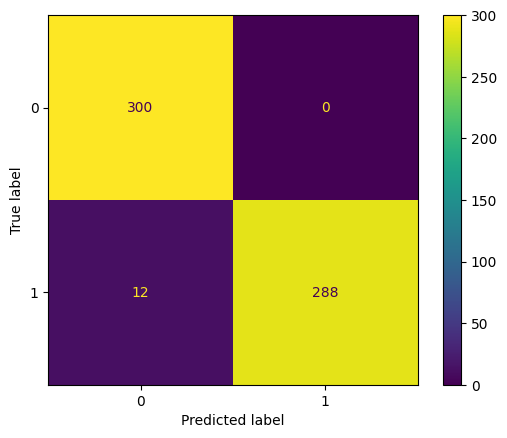

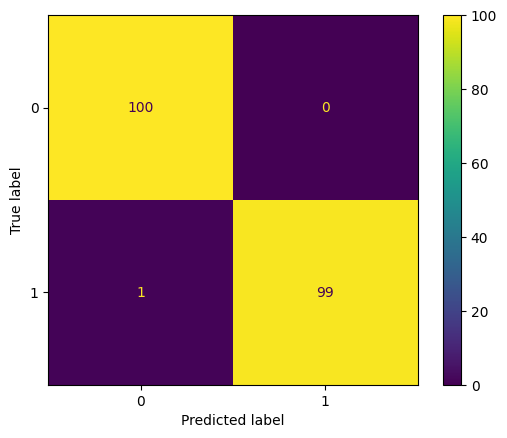

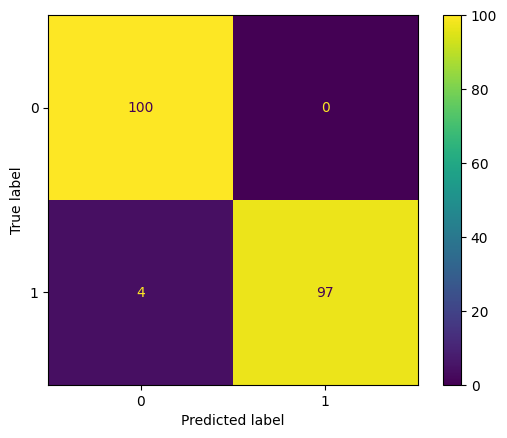

Box Constraint: 0.1, gamma = 10.0
  Accuracy for training: 0.9833333333333333
[[300   0]
 [ 10 290]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9850746268656716
[[100   0]
 [  3  98]]


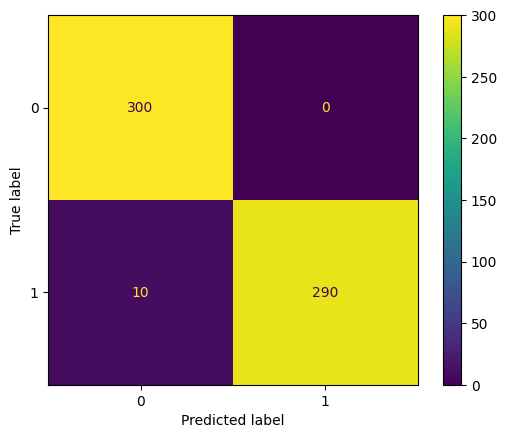

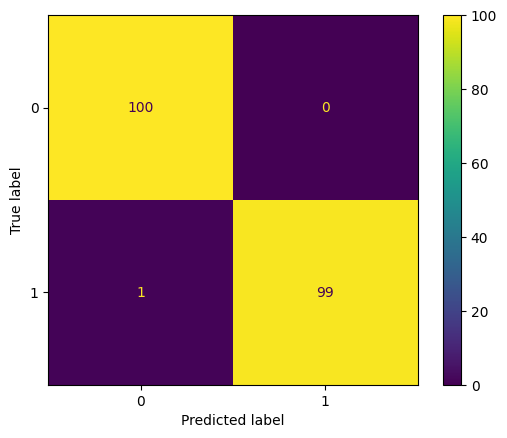

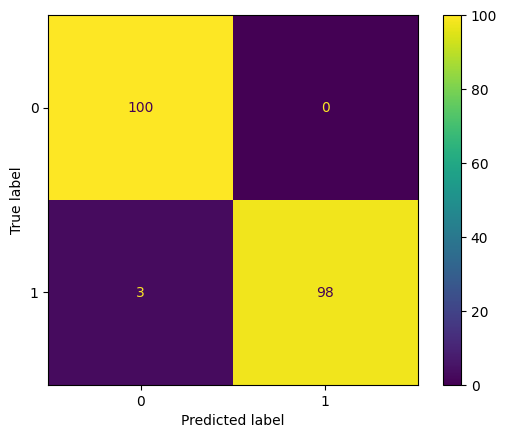

Box Constraint: 1.0, gamma = 0.1
  Accuracy for training: 0.9783333333333334
[[300   0]
 [ 13 287]]
  Accuracy for validation: 0.99
[[100   0]
 [  2  98]]
  Accuracy for testing: 0.9800995024875622
[[100   0]
 [  4  97]]


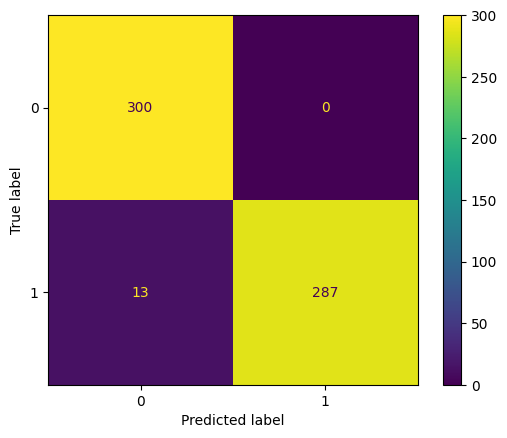

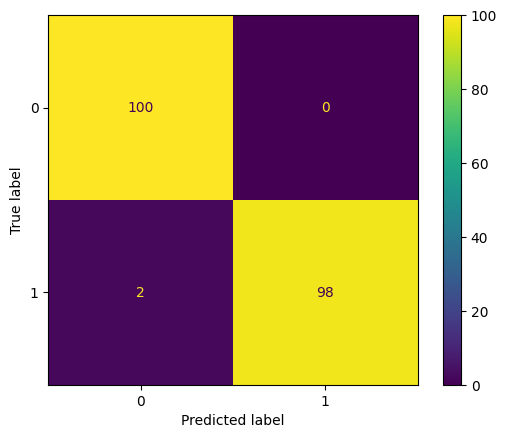

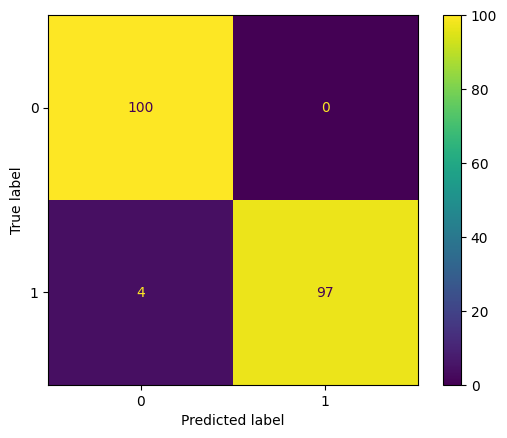

Box Constraint: 1.0, gamma = 1.0
  Accuracy for training: 0.9816666666666667
[[300   0]
 [ 11 289]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9850746268656716
[[100   0]
 [  3  98]]


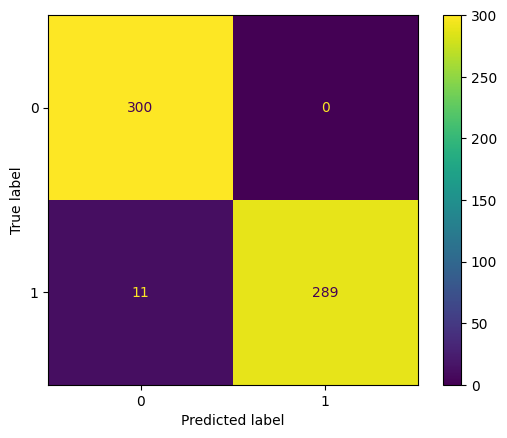

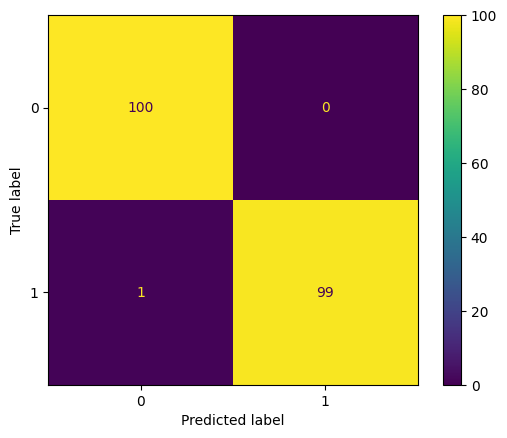

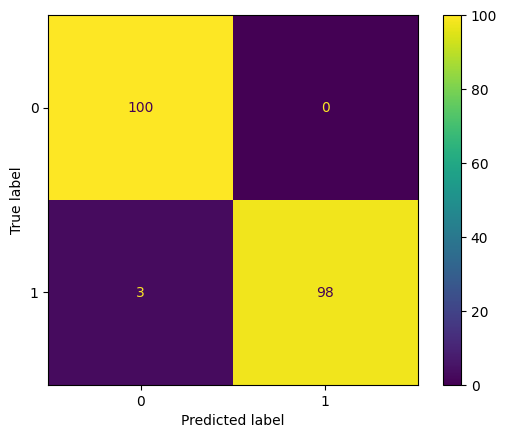

Box Constraint: 1.0, gamma = 10.0
  Accuracy for training: 0.985
[[300   0]
 [  9 291]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9900497512437811
[[100   0]
 [  2  99]]


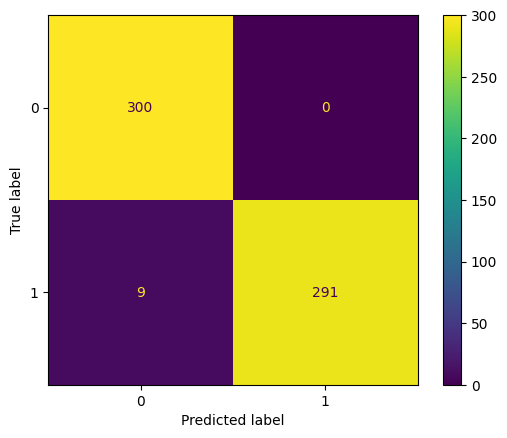

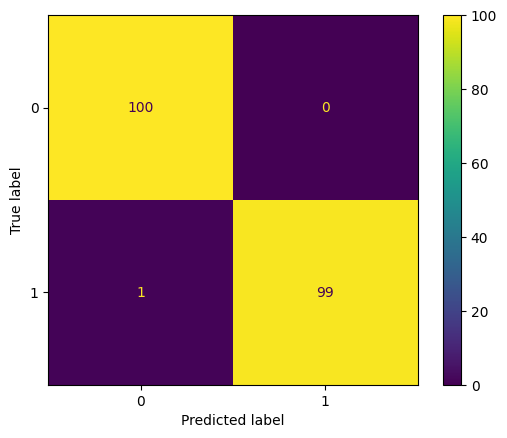

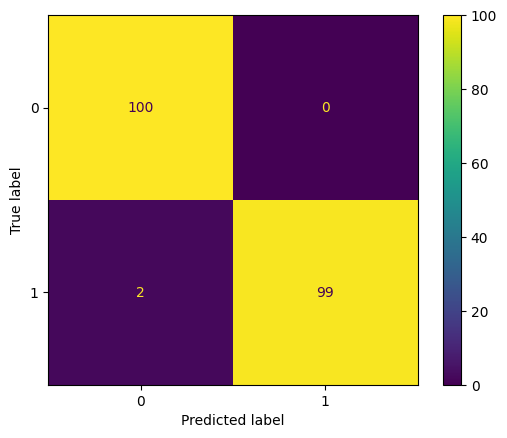

Box Constraint: 10.0, gamma = 0.1
  Accuracy for training: 0.9816666666666667
[[300   0]
 [ 11 289]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9850746268656716
[[100   0]
 [  3  98]]


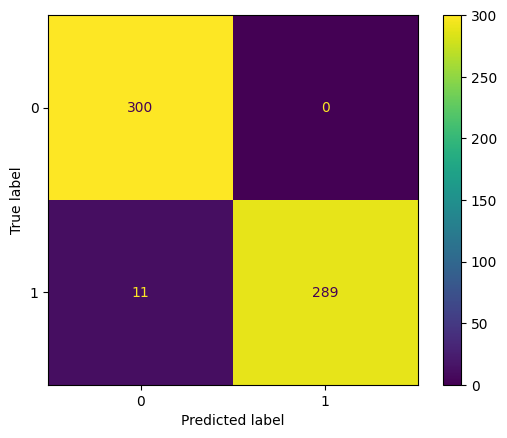

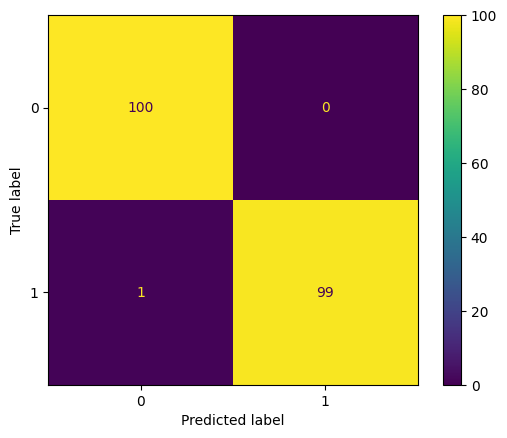

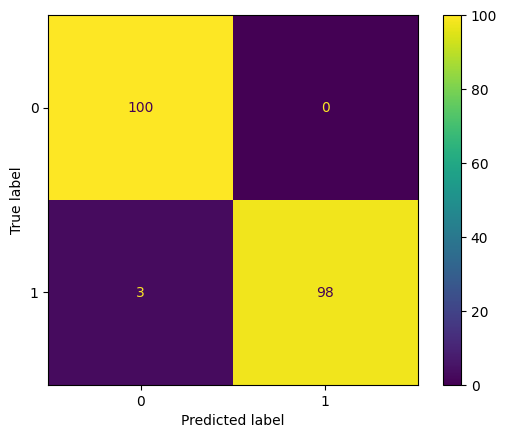

Box Constraint: 10.0, gamma = 1.0
  Accuracy for training: 0.9883333333333333
[[300   0]
 [  7 293]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9900497512437811
[[100   0]
 [  2  99]]


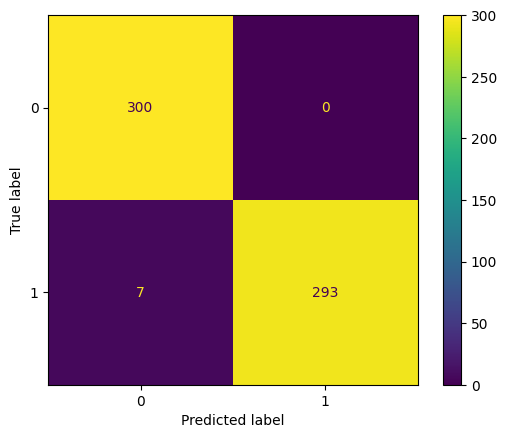

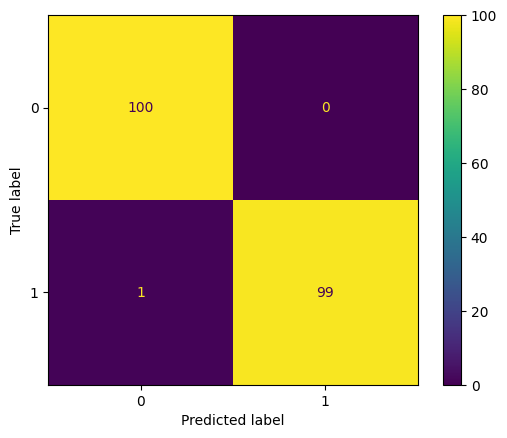

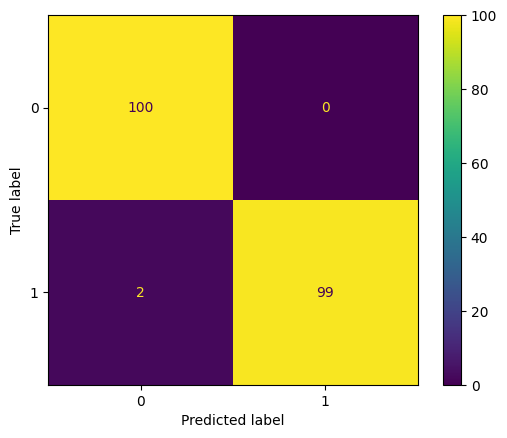

Box Constraint: 10.0, gamma = 10.0
  Accuracy for training: 0.99
[[300   0]
 [  6 294]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9950248756218906
[[100   0]
 [  1 100]]


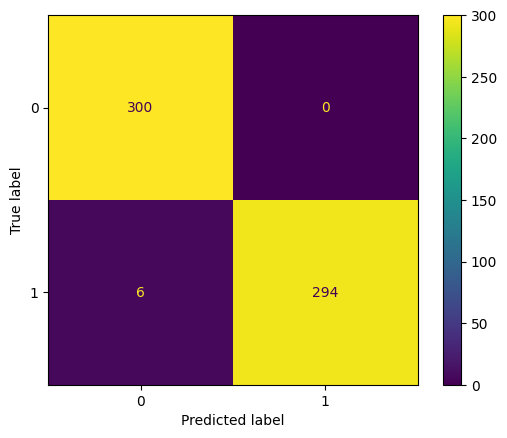

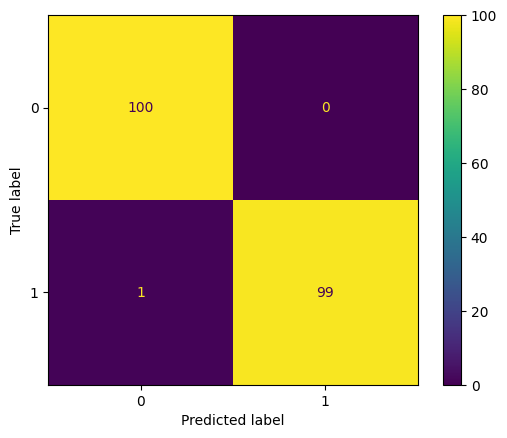

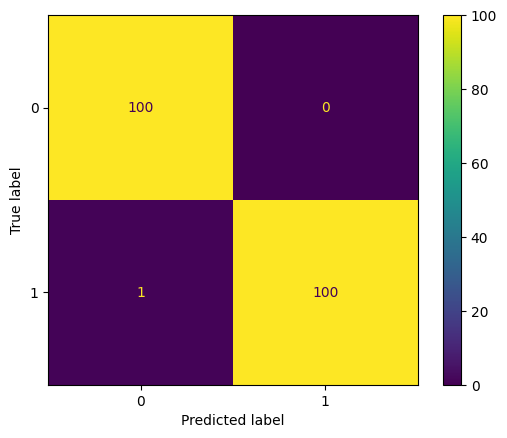

Best parameters (based on training & validation accuracy): (10.0, 10.0)
Best training accuracy: 0.99
Best validation accuracy: 0.995


In [13]:
# Variables to track the best model
best_val_score = 0
best_train_score = 0
best_params = None
best_model = None

for i in range(len(box_C)):
    print(f"Box Constraint: {box_C[i]}, gamma = {gamma[i]}")
    
    mdl = SVC(C=box_C[i], gamma=gamma[i]).fit(X_train_2, y_train)
    
    y_pred_train = mdl.predict(X_train_2)
    y_pred_val = mdl.predict(X_val_2)
    y_pred_test = mdl.predict(X_test_2)
    
    train_acc = mdl.score(X_train_2, y_train)
    val_acc = mdl.score(X_val_2, y_val)
    test_acc = mdl.score(X_test_2, y_test)
    
    print(f"  Accuracy for training: {train_acc}")
    cm_train = confusion_matrix(y_train, y_pred_train)
    print(cm_train)
    
    print(f"  Accuracy for validation: {val_acc}")
    cm_val = confusion_matrix(y_val, y_pred_val)
    print(cm_val)
    
    print(f"  Accuracy for testing: {test_acc}")
    cm_test = confusion_matrix(y_test, y_pred_test)
    print(cm_test)

    # Plot confusion matrices
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
    disp.plot()
    plt.show()

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
    disp.plot()
    plt.show()

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp.plot()
    plt.show()

    # Track the best model based on validation accuracy
    if val_acc > best_val_score or (val_acc == best_val_score and train_acc > best_train_score):
        best_val_score = val_acc
        best_train_score = train_acc
        best_params = (box_C[i], gamma[i])
        best_model = mdl
        
print("Best parameters (based on training & validation accuracy):", best_params)
print("Best training accuracy:", best_train_score)
print("Best validation accuracy:", best_val_score)

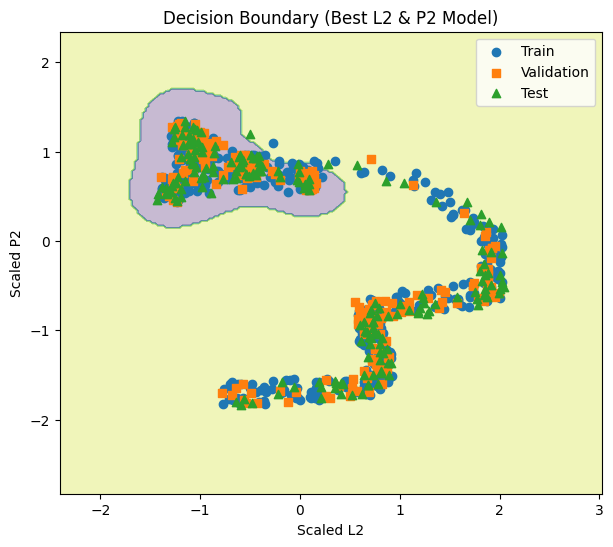

In [7]:
#For Decision Boundary
plt.figure(figsize=(7,6))

X_min, X_max = X_train_2[:,0].min()-1, X_train_2[:,0].max()+1
Y_min, Y_max = X_train_2[:,1].min()-1, X_train_2[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(X_min,X_max,200),
                     np.linspace(Y_min,Y_max,200))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(X_train_2[:,0], X_train_2[:,1], marker='o', label='Train')
plt.scatter(X_val_2[:,0], X_val_2[:,1], marker='s', label='Validation')
plt.scatter(X_test_2[:,0], X_test_2[:,1], marker='^', label='Test')

plt.xlabel('Scaled L2')
plt.ylabel('Scaled P2')
plt.legend()
plt.title('Decision Boundary (Best L2 & P2 Model)')
plt.show()


In [17]:
# Number 3: using all features (L2, P2, X2)
X_train_full = X_train_scaled
X_val_full   = X_val_scaled
X_test_full  = X_test_scaled

box_C = np.array([0.1,0.1,0.1, 1,1,1, 10,10,10])
gamma = np.array([0.1,1,10, 0.1,1,10, 0.1,1,10])

Box Constraint: 0.1, gamma = 0.1
  Accuracy for training: 0.975
[[300   0]
 [ 15 285]]
  Accuracy for validation: 0.99
[[100   0]
 [  2  98]]
  Accuracy for testing: 0.9751243781094527
[[100   0]
 [  5  96]]


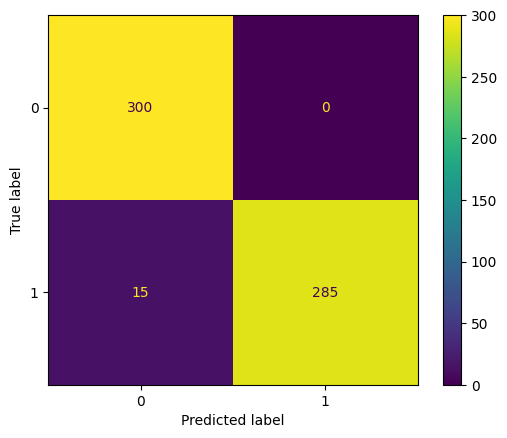

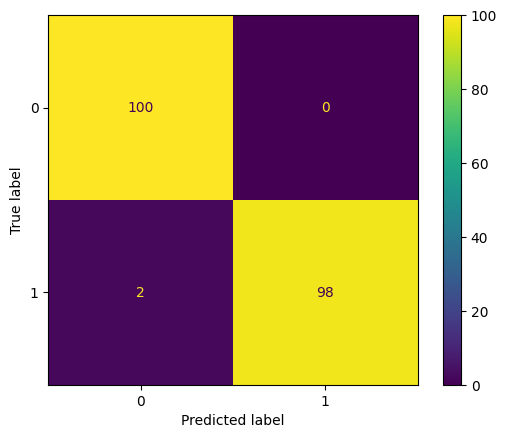

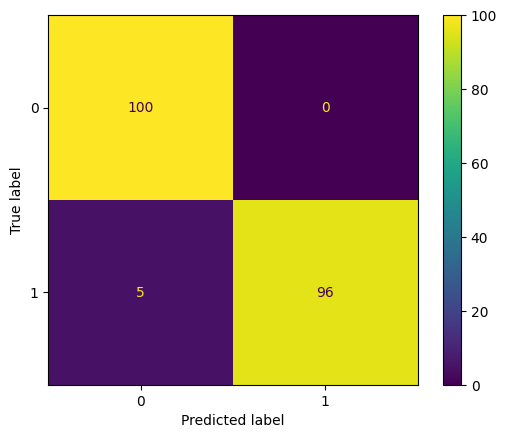

Box Constraint: 0.1, gamma = 1.0
  Accuracy for training: 0.9816666666666667
[[300   0]
 [ 11 289]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9850746268656716
[[100   0]
 [  3  98]]


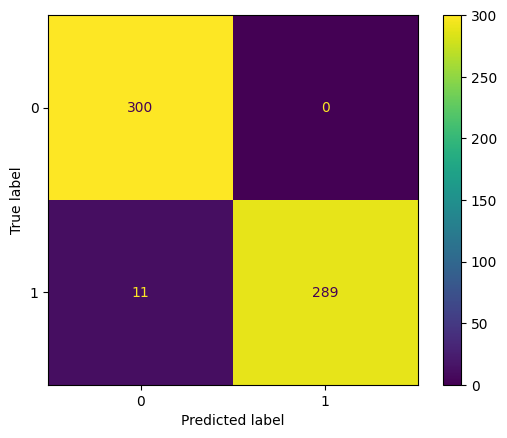

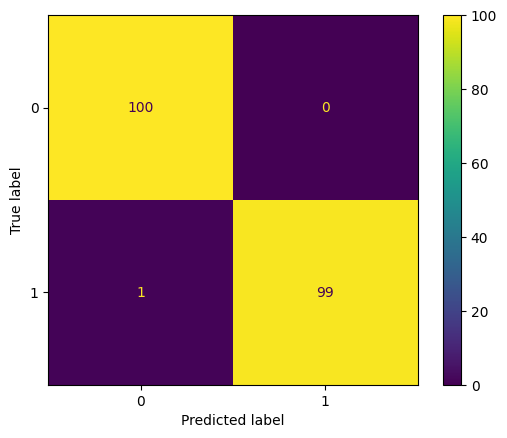

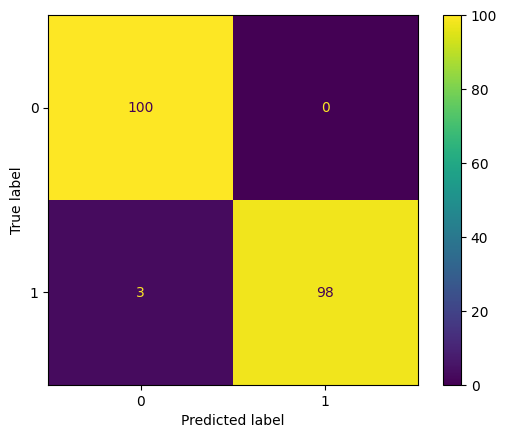

Box Constraint: 0.1, gamma = 10.0
  Accuracy for training: 0.9866666666666667
[[300   0]
 [  8 292]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9950248756218906
[[100   0]
 [  1 100]]


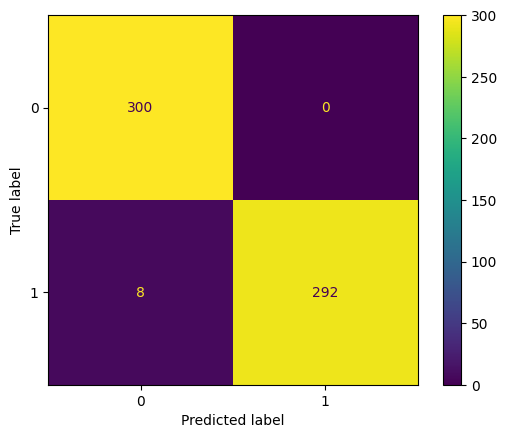

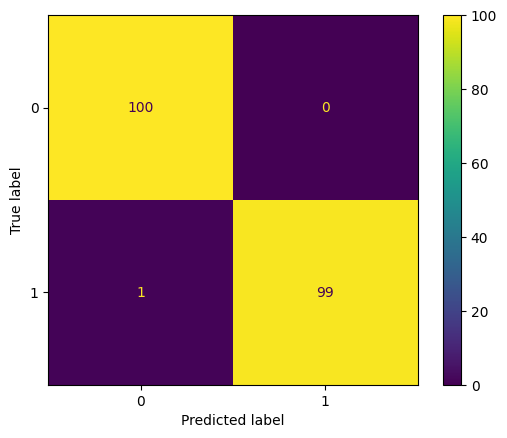

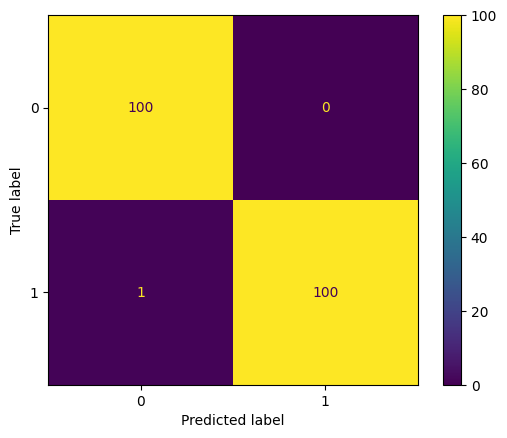

Box Constraint: 1.0, gamma = 0.1
  Accuracy for training: 0.98
[[300   0]
 [ 12 288]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9800995024875622
[[100   0]
 [  4  97]]


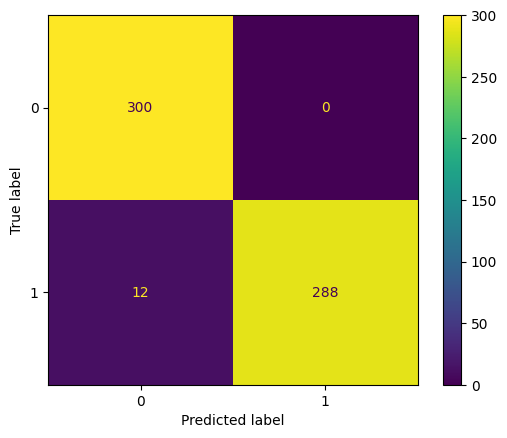

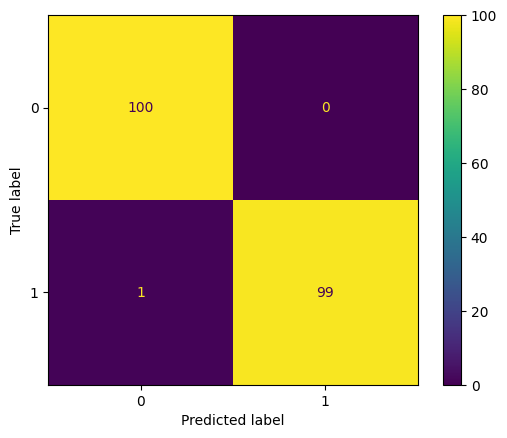

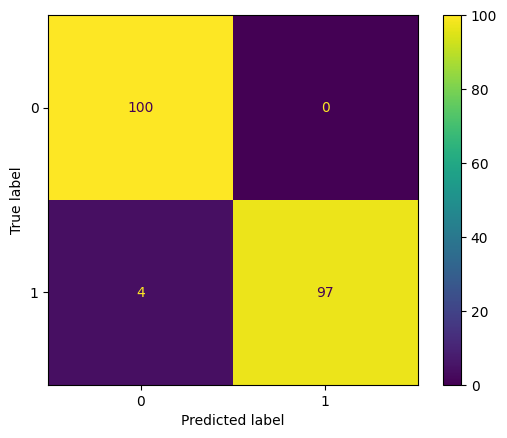

Box Constraint: 1.0, gamma = 1.0
  Accuracy for training: 0.9816666666666667
[[300   0]
 [ 11 289]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9900497512437811
[[100   0]
 [  2  99]]


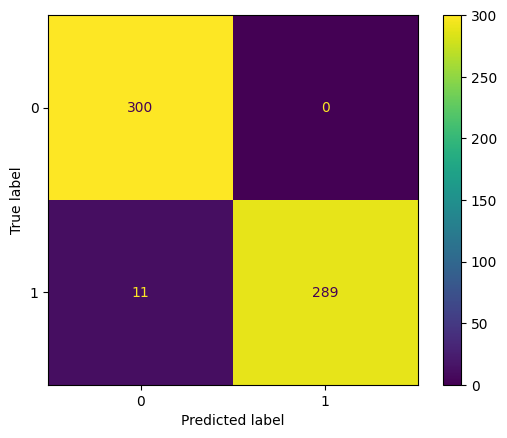

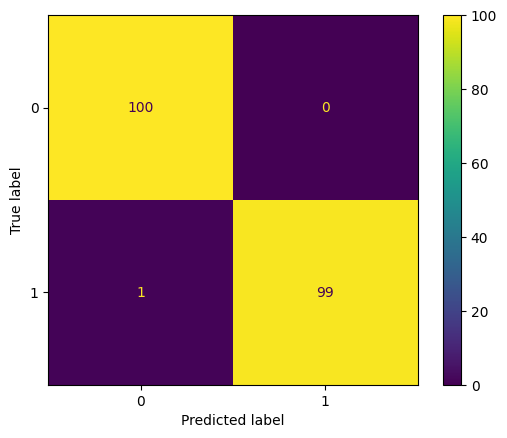

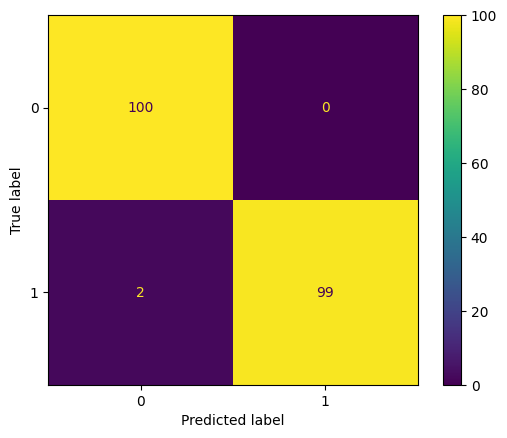

Box Constraint: 1.0, gamma = 10.0
  Accuracy for training: 0.9916666666666667
[[300   0]
 [  5 295]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9950248756218906
[[100   0]
 [  1 100]]


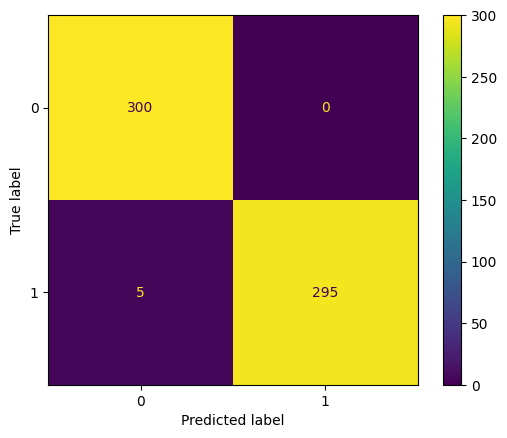

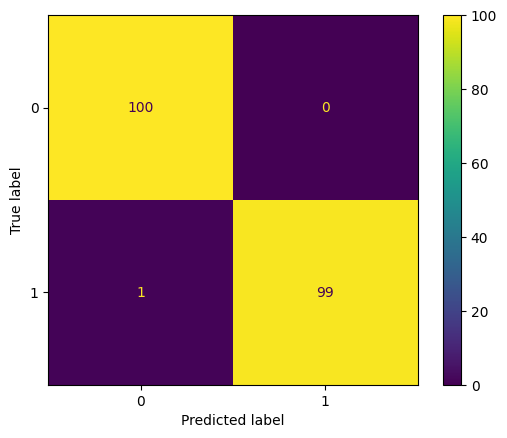

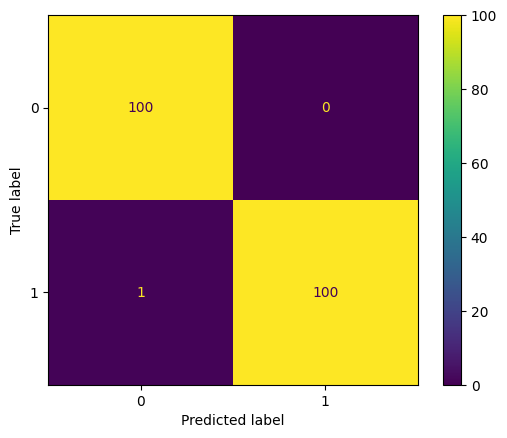

Box Constraint: 10.0, gamma = 0.1
  Accuracy for training: 0.9816666666666667
[[300   0]
 [ 11 289]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9850746268656716
[[100   0]
 [  3  98]]


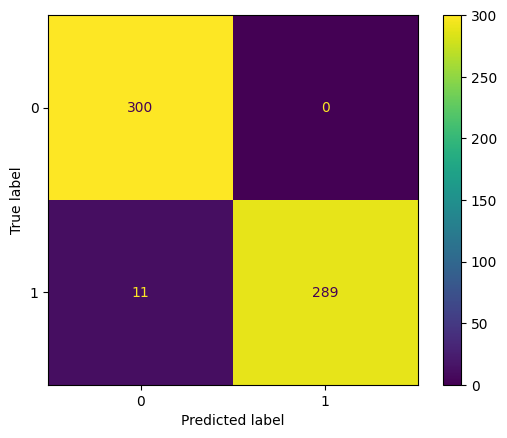

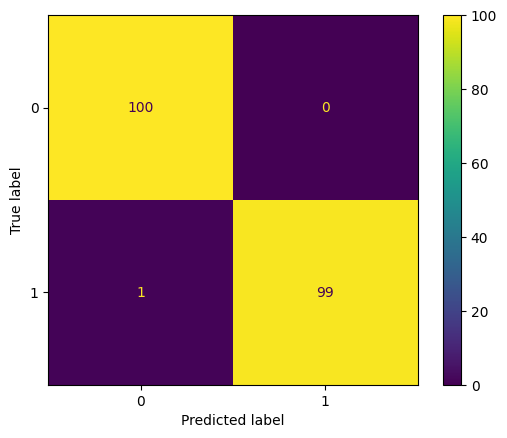

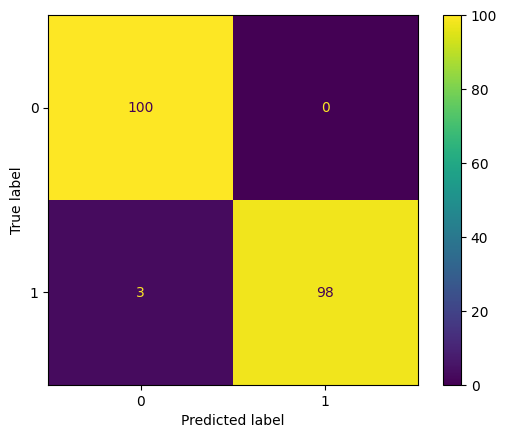

Box Constraint: 10.0, gamma = 1.0
  Accuracy for training: 0.99
[[300   0]
 [  6 294]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9900497512437811
[[ 99   1]
 [  1 100]]


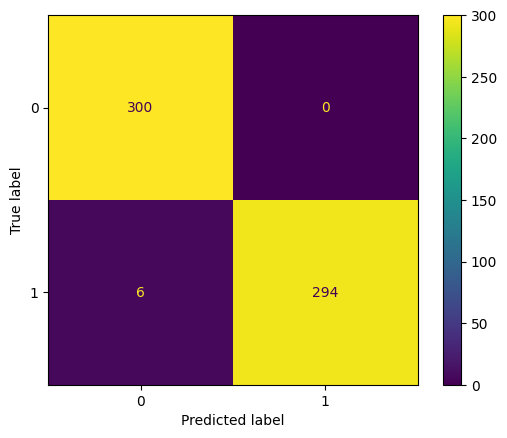

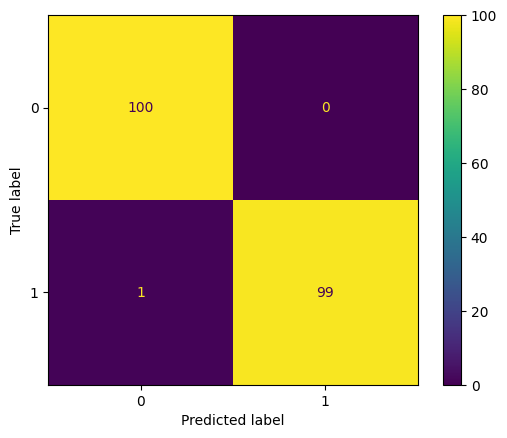

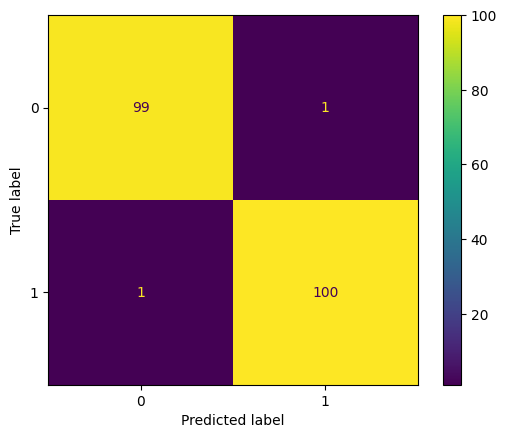

Box Constraint: 10.0, gamma = 10.0
  Accuracy for training: 0.995
[[300   0]
 [  3 297]]
  Accuracy for validation: 0.99
[[99  1]
 [ 1 99]]
  Accuracy for testing: 0.9950248756218906
[[100   0]
 [  1 100]]


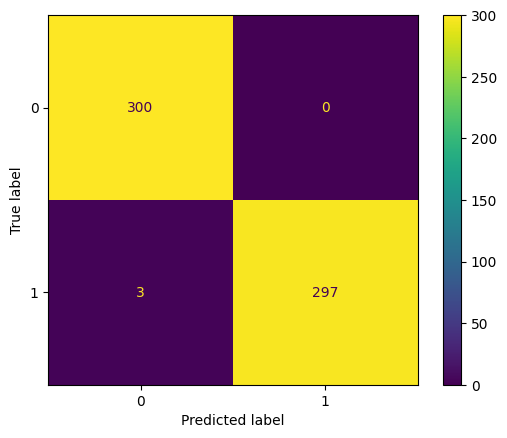

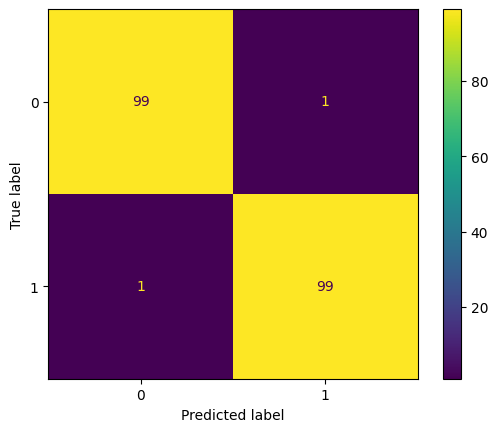

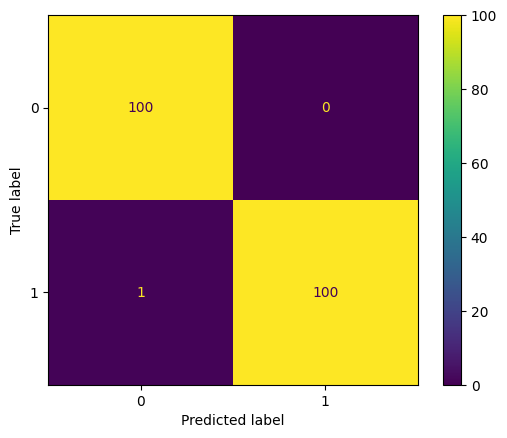

Best parameters (based on training & validation accuracy): (1.0, 10.0)
Best training accuracy: 0.9916666666666667
Best validation accuracy: 0.995


In [18]:
# Variables to track the best model
best_val_score = 0
best_train_score = 0
best_params = None
best_model = None

for i in range(len(box_C)):
    print(f"Box Constraint: {box_C[i]}, gamma = {gamma[i]}")
    
    mdl = SVC(C=box_C[i], gamma=gamma[i]).fit(X_train_full, y_train)
    
    y_pred_train = mdl.predict(X_train_full)
    y_pred_val = mdl.predict(X_val_full)
    y_pred_test = mdl.predict(X_test_full)
    
    train_acc = mdl.score(X_train_full, y_train)
    val_acc = mdl.score(X_val_full, y_val)
    test_acc = mdl.score(X_test_full, y_test)
    
    print(f"  Accuracy for training: {train_acc}")
    cm_train = confusion_matrix(y_train, y_pred_train)
    print(cm_train)
    
    print(f"  Accuracy for validation: {val_acc}")
    cm_val = confusion_matrix(y_val, y_pred_val)
    print(cm_val)
    
    print(f"  Accuracy for testing: {test_acc}")
    cm_test = confusion_matrix(y_test, y_pred_test)
    print(cm_test)
    
    # Plot confusion matrices (optional; no decision boundary needed)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
    disp.plot()
    plt.show()
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
    disp.plot()
    plt.show()
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp.plot()
    plt.show()
    
    # Track the best model based on validation accuracy
    if val_acc > best_val_score or (val_acc == best_val_score and train_acc > best_train_score):
        best_val_score = val_acc
        best_train_score = train_acc
        best_params = (box_C[i], gamma[i])
        best_model = mdl

print("Best parameters (based on training & validation accuracy):", best_params)
print("Best training accuracy:", best_train_score)
print("Best validation accuracy:", best_val_score)